In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

# Import Data

In [2]:
# import data
articles = pd.read_csv('/Users/gloriahwoang/Desktop/DS_Portfolio/hmRecommenderSys/articles.csv')
customers = pd.read_csv('/Users/gloriahwoang/Desktop/DS_Portfolio/hmRecommenderSys/customers.csv')
transactions = pd.read_csv('/Users/gloriahwoang/Desktop/DS_Portfolio/hmRecommenderSys/transactions_train.csv')

In [3]:
print(articles.shape)
display(articles.head())

(105542, 25)


,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [4]:
print(customers.shape)
display(customers.head())

(1371980, 7)


,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [5]:
print(transactions.shape)
display(transactions.head())

(31788324, 5)


,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


# Articles EDA

In [6]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [7]:
print('The shape of articles is:', articles.shape)
print('The columns of articles are:', articles.columns)

The shape of articles is: (105542, 25)
The columns of articles are: Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')


In [8]:
articles.nunique() # unique items in each column start with columns with less unique values

article_id                      105542
product_code                     47224
prod_name                        45875
product_type_no                    132
product_type_name                  131
product_group_name                  19
graphical_appearance_no             30
graphical_appearance_name           30
colour_group_code                   50
colour_group_name                   50
perceived_colour_value_id            8
perceived_colour_value_name          8
perceived_colour_master_id          20
perceived_colour_master_name        20
department_no                      299
department_name                    250
index_code                          10
index_name                          10
index_group_no                       5
index_group_name                     5
section_no                          57
section_name                        56
garment_group_no                    21
garment_group_name                  21
detail_desc                      43404
dtype: int64

### Which index_group_name is the largest in inventory?

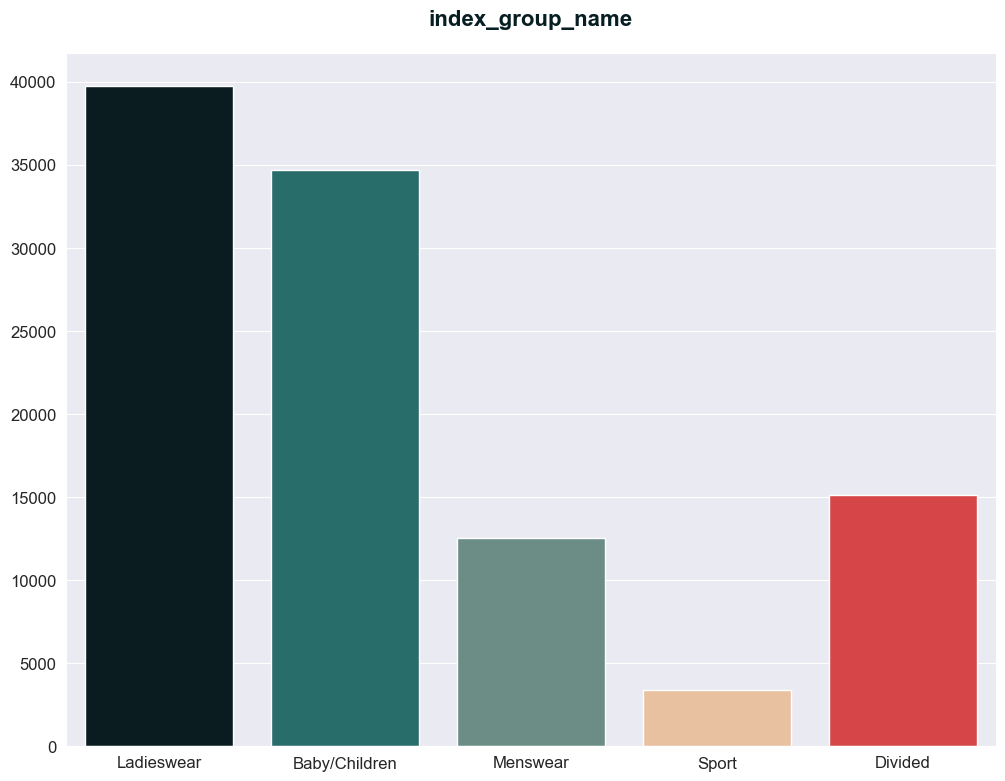

In [20]:
# setting plot parameters
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
fig = plt.figure(figsize=(12,9))
color = ["#071E22", "#1D7874", "#679289", "#F4C095", "#EE2E31"]
sns.set_palette(color)
sns.set_style("darkgrid")

# distribution of index_group_name
IGN = sns.countplot(data=articles, x='index_group_name')
IGN.set(xlabel=None)
IGN.set(ylabel=None)

plt.title('index_group_name', fontsize=16, color="#071E22", pad=20, fontweight="bold")
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

### How does age product_group_name to index_group_name?

/var/folders/fn/p5d5tjws2g5g48w4774bp3_h0000gn/T/ipykernel_9970/943566972.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


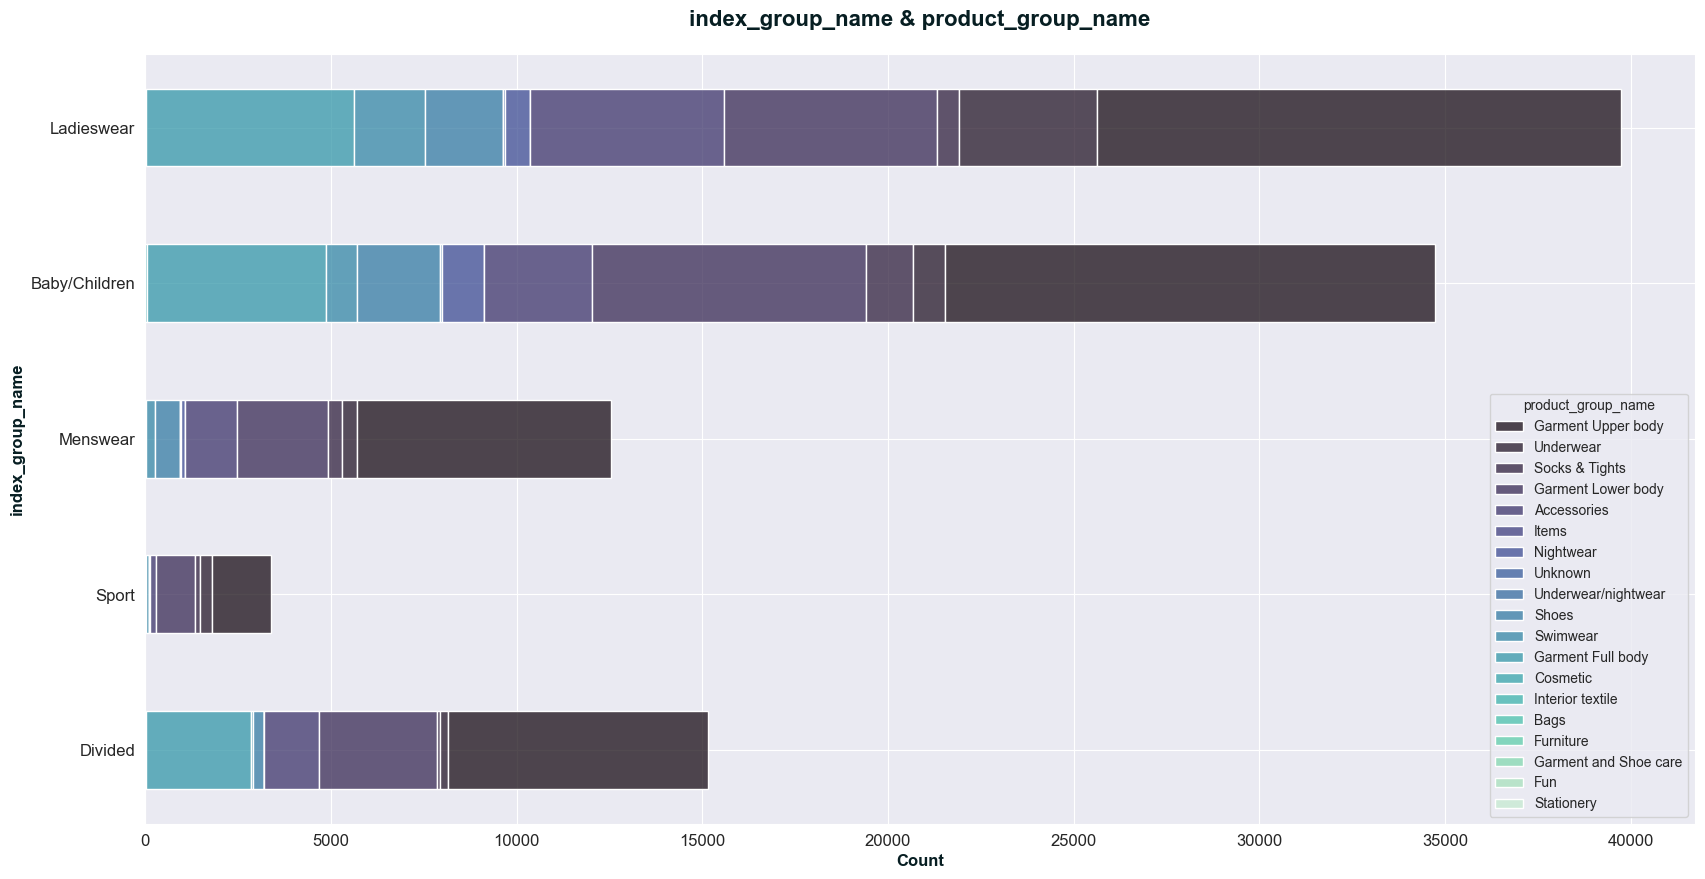

In [28]:
fig = plt.figure(figsize=(20, 10))
sns.histplot(data=articles, y='index_group_name', hue='product_group_name', multiple='stack', shrink=.5, palette='mako')
plt.title('index_group_name & product_group_name', fontsize=16, color="#071E22", pad=20, fontweight="bold")
plt.xlabel('Count', fontsize=12, color="#071E22", fontweight="bold")
plt.ylabel('index_group_name', fontsize=12, color="#071E22", fontweight="bold")
plt.tick_params(axis='both', which='major', labelsize=12)
fig.show()

### Top 20 Products in Inventory

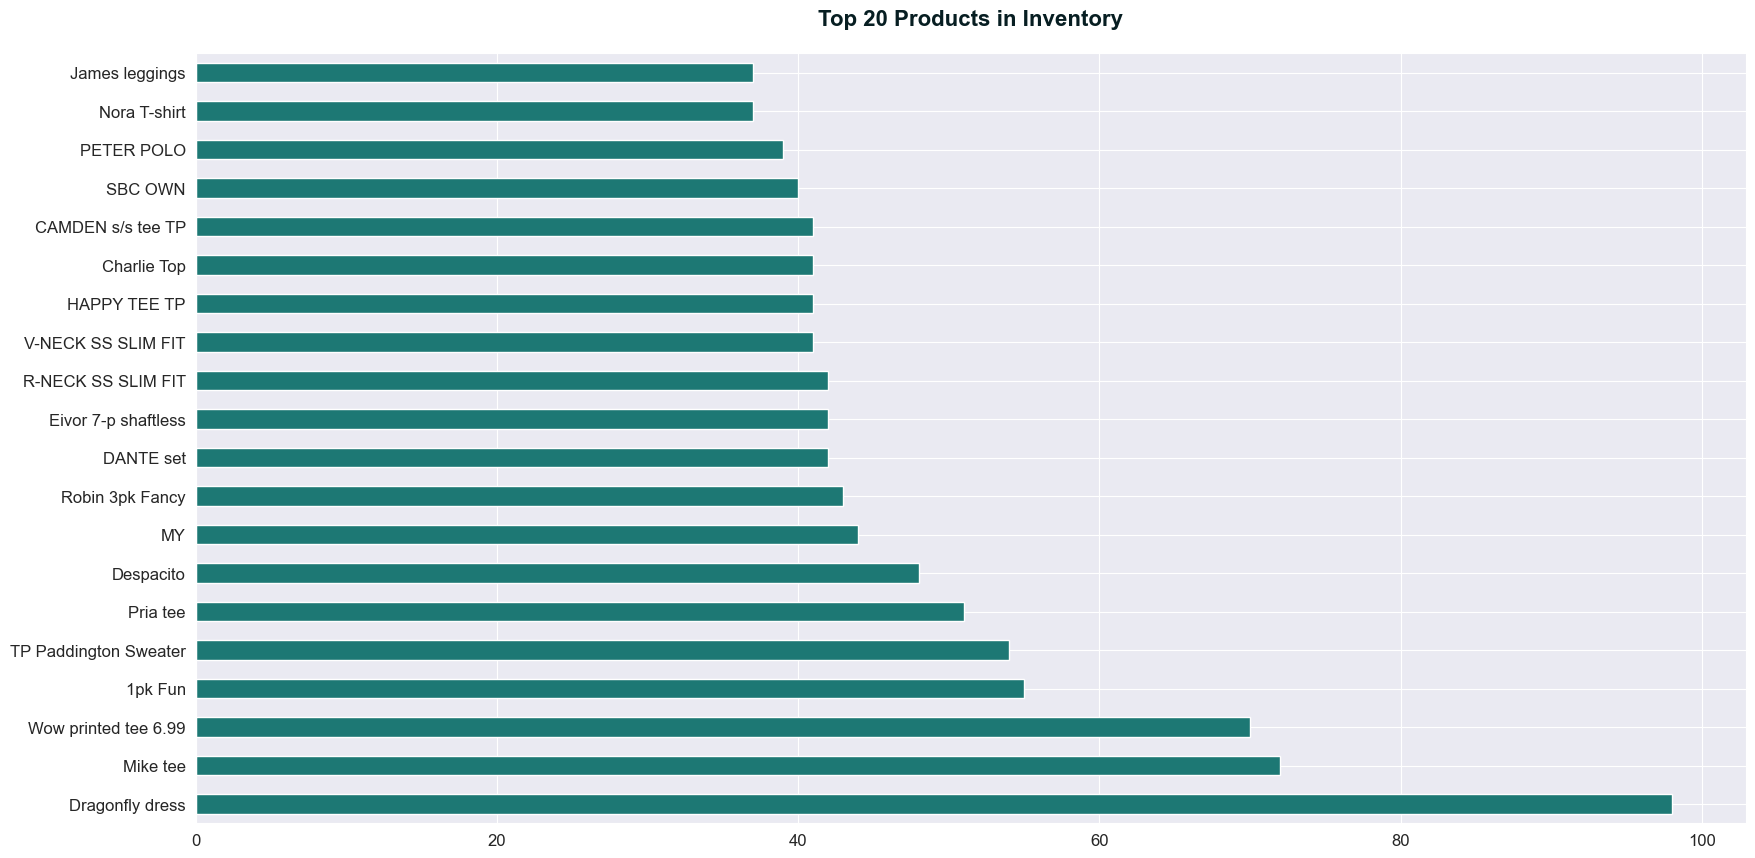

In [22]:
fig = plt.figure(figsize=(20, 10))
top20 = articles['prod_name'].value_counts(ascending=False)[:20].plot(kind='barh', color='#1D7874')
plt.title('Top 20 Products in Inventory', fontsize=16, color="#071E22", pad=20, fontweight="bold")
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

### How does age garment_group_name to index_group_name?

/var/folders/fn/p5d5tjws2g5g48w4774bp3_h0000gn/T/ipykernel_9970/1826091906.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


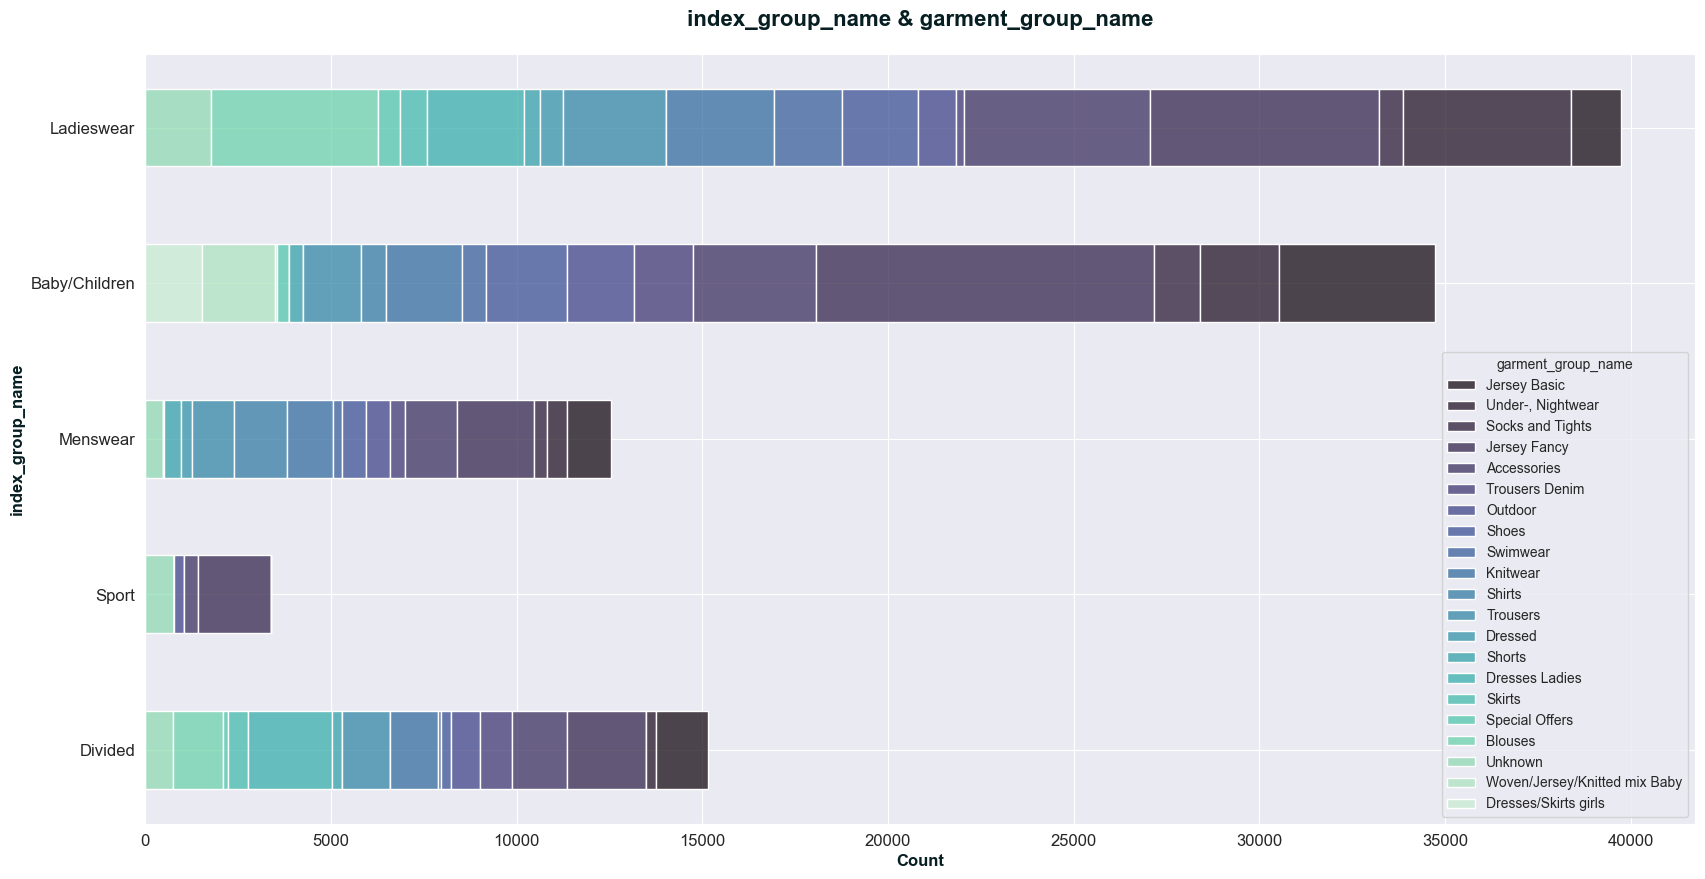

In [35]:
fig = plt.figure(figsize=(20, 10))
sns.histplot(data=articles, y='index_group_name', hue='garment_group_name', multiple='stack', shrink=.5, palette='mako')
plt.title('index_group_name & garment_group_name', fontsize=16, color="#071E22", pad=20, fontweight="bold")
plt.xlabel('Count', fontsize=12, color="#071E22", fontweight="bold")
plt.ylabel('index_group_name', fontsize=12, color="#071E22", fontweight="bold")
plt.tick_params(axis='both', which='major', labelsize=12)
fig.show()

### How does age perceived_colour_value_name to index_group_name?

/var/folders/fn/p5d5tjws2g5g48w4774bp3_h0000gn/T/ipykernel_9970/1723889095.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


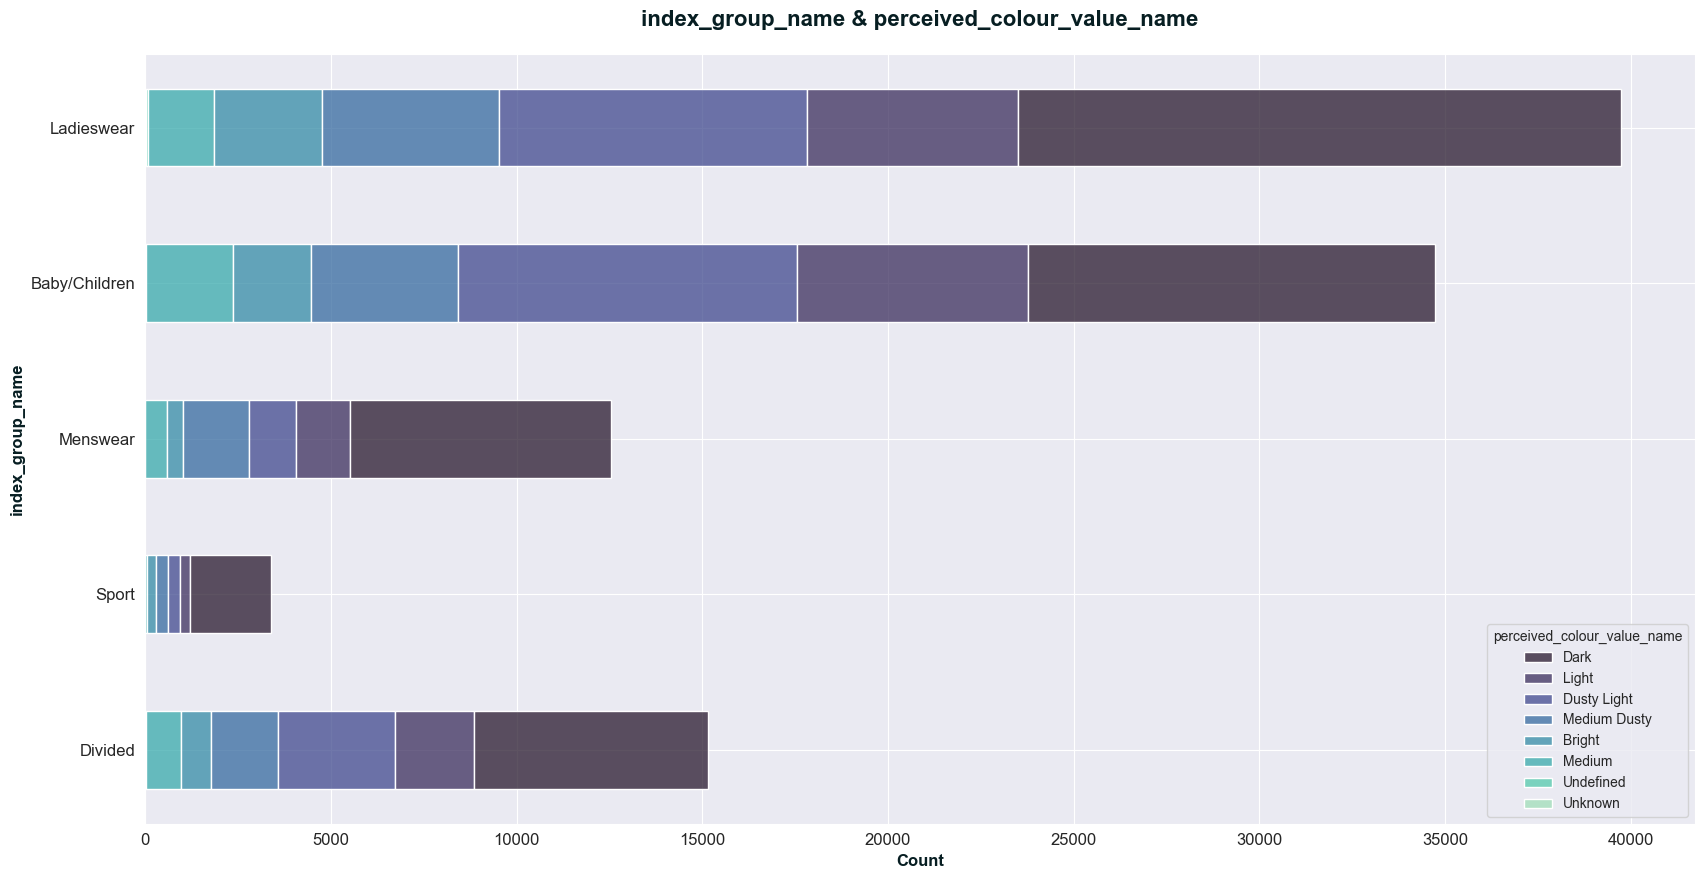

In [57]:
fig = plt.figure(figsize=(20, 10))
sns.histplot(data=articles, y='index_group_name', hue='perceived_colour_value_name', multiple='stack', shrink=.5, palette='mako')
plt.title('index_group_name & perceived_colour_value_name', fontsize=16, color="#071E22", pad=20, fontweight="bold")
plt.xlabel('Count', fontsize=12, color="#071E22", fontweight="bold")
plt.ylabel('index_group_name', fontsize=12, color="#071E22", fontweight="bold")
plt.tick_params(axis='both', which='major', labelsize=12)
fig.show()

### Which perceived_colour_value_name is the largest in inventory?

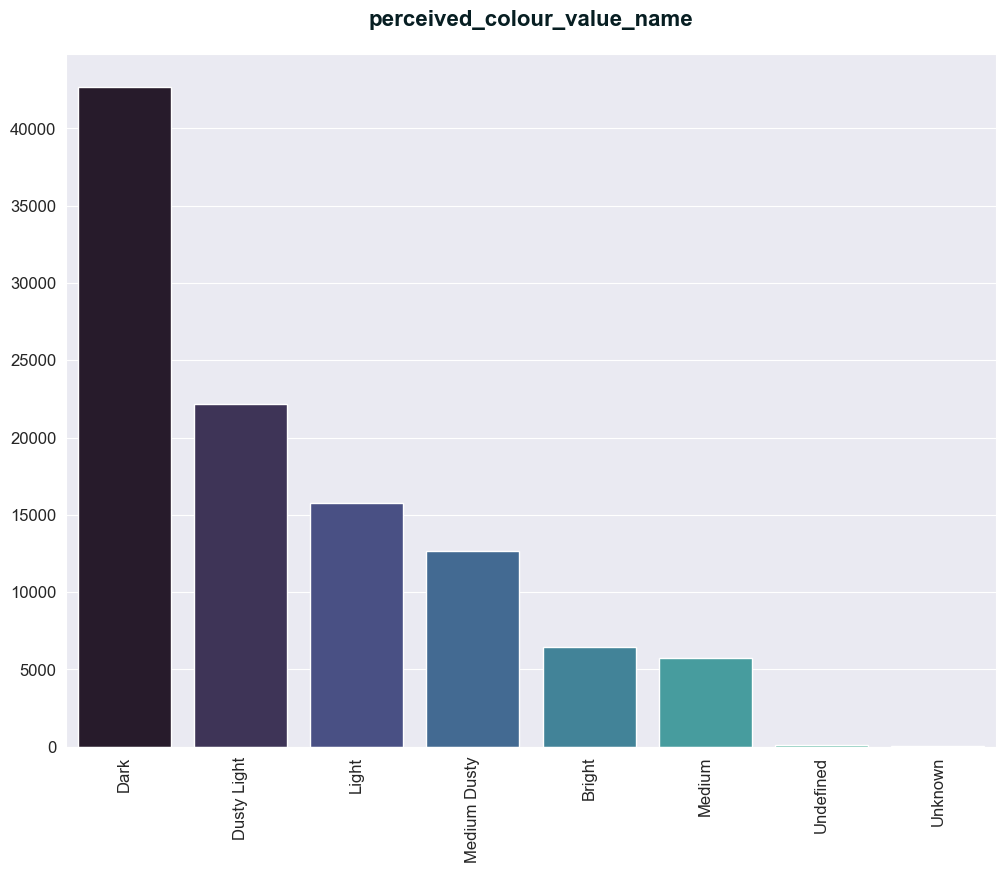

In [82]:
# distribution of perceived_colour_value_name
fig = plt.figure(figsize=(12,9))
GAN = sns.countplot(data=articles, x='perceived_colour_value_name', palette='mako', order = articles['perceived_colour_value_name'].value_counts().index)
GAN.set(xlabel=None)
GAN.set(ylabel=None)
GAN.tick_params(axis='x', rotation=90)

plt.title('perceived_colour_value_name', fontsize=16, color="#071E22", pad=20, fontweight="bold")
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

### Which graphical_appearance_name is the largest in inventory?

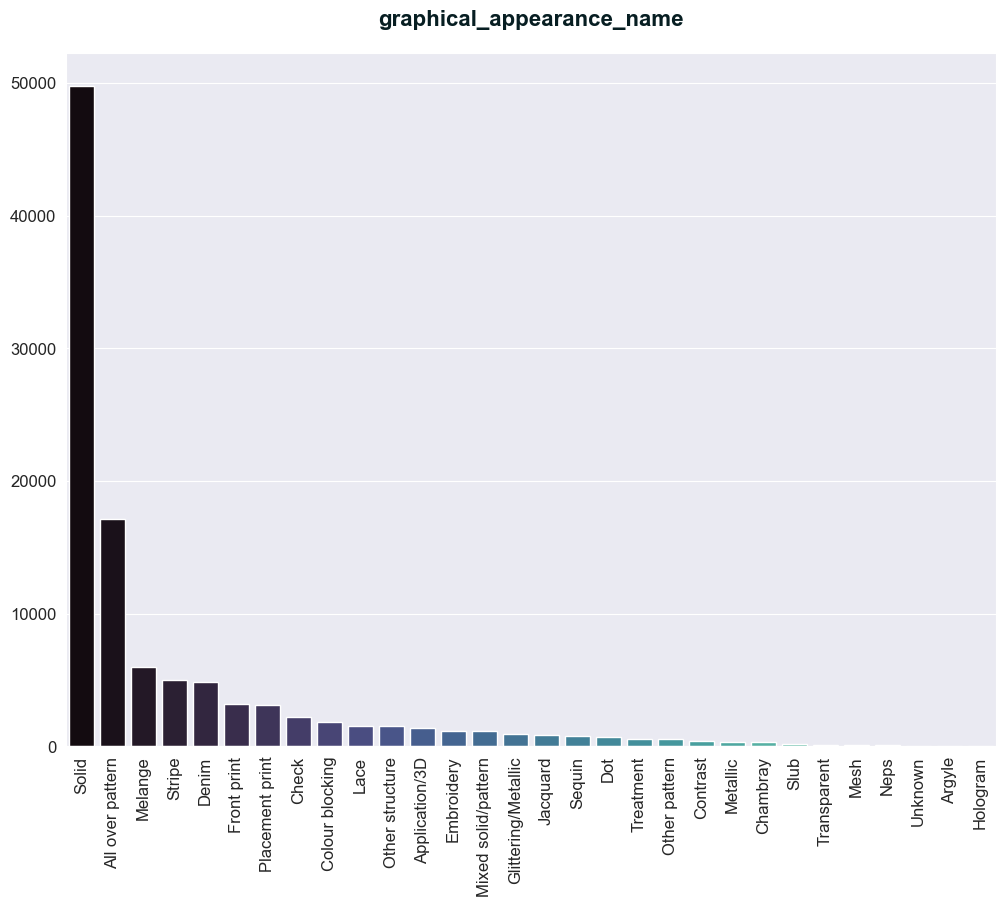

In [55]:
# distribution of graphical_appearance_name
fig = plt.figure(figsize=(12,9))
GAN = sns.countplot(data=articles, x='graphical_appearance_name', palette='mako', order = articles['graphical_appearance_name'].value_counts().index)
GAN.set(xlabel=None)
GAN.set(ylabel=None)
GAN.tick_params(axis='x', rotation=90)

plt.title('graphical_appearance_name', fontsize=16, color="#071E22", pad=20, fontweight="bold")
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

### Which perceived_colour_master_name is the largest in inventory?

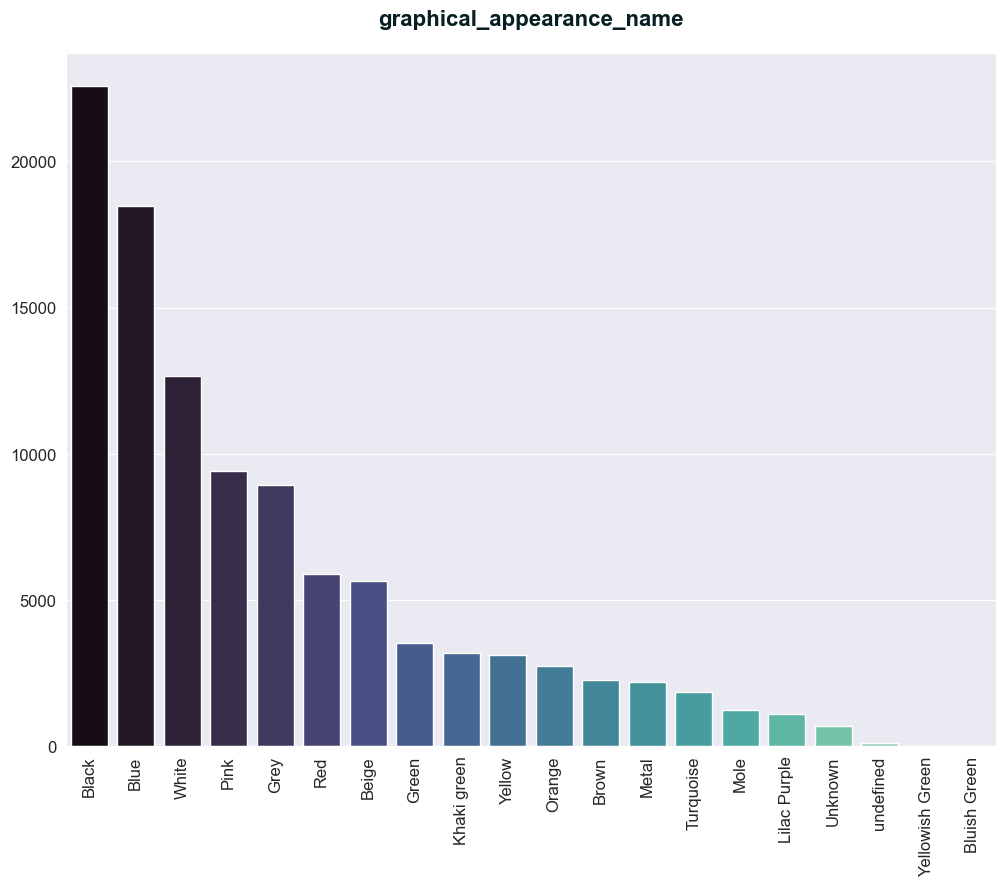

In [59]:
# distribution of perceived_colour_master_name
fig = plt.figure(figsize=(12,9))
PCMN = sns.countplot(data=articles, x='perceived_colour_master_name', palette='mako', order = articles['perceived_colour_master_name'].value_counts().index)
PCMN.set(xlabel=None)
PCMN.set(ylabel=None)
PCMN.tick_params(axis='x', rotation=90)

plt.title('graphical_appearance_name', fontsize=16, color="#071E22", pad=20, fontweight="bold")
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

# Customers EDA

In [60]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [62]:
print('The shape of customers is:', customers.shape)
print('The columns of customers are:', customers.columns)

The shape of customers is: (1371980, 7)
The columns of customers are: Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code'],
      dtype='object')


In [63]:
customers.nunique() # unique items in each column start with columns with less unique values

customer_id               1371980
FN                              1
Active                          1
club_member_status              3
fashion_news_frequency          4
age                            84
postal_code                352899
dtype: int64

In [64]:
customers.describe()

,FN,Active,age
count,476930.0,464404.0,1.356119e+06
mean,1.0,1.0,3.638696e+01
std,0.0,0.0,1.431363e+01
min,1.0,1.0,1.600000e+01
25%,1.0,1.0,2.400000e+01
50%,1.0,1.0,3.200000e+01
75%,1.0,1.0,4.900000e+01
max,1.0,1.0,9.900000e+01


### How is age distributed?

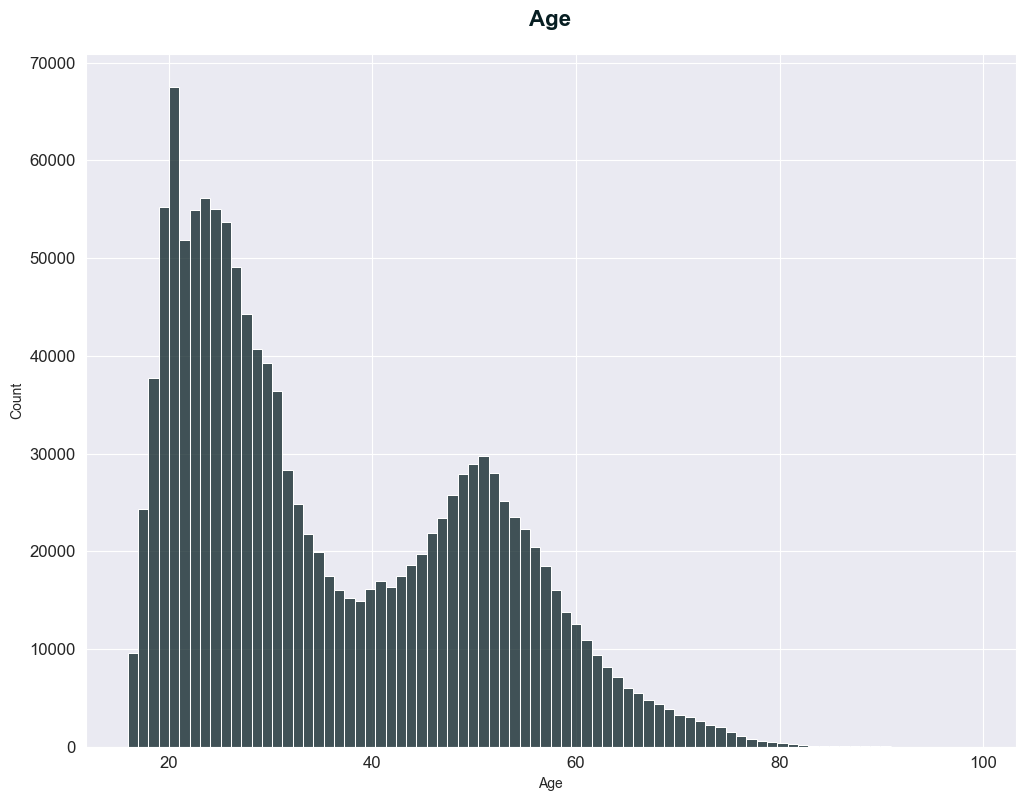

In [73]:
fig = plt.figure(figsize=(12, 9))
age = sns.histplot(customers, x='age', bins=82)
age.set(xlabel='Age')
age.set(ylabel='Count')

plt.title('Age', fontsize=16, color="#071E22", pad=20, fontweight="bold")
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

### What is the most common club_member_status?


/var/folders/fn/p5d5tjws2g5g48w4774bp3_h0000gn/T/ipykernel_9970/2462569287.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


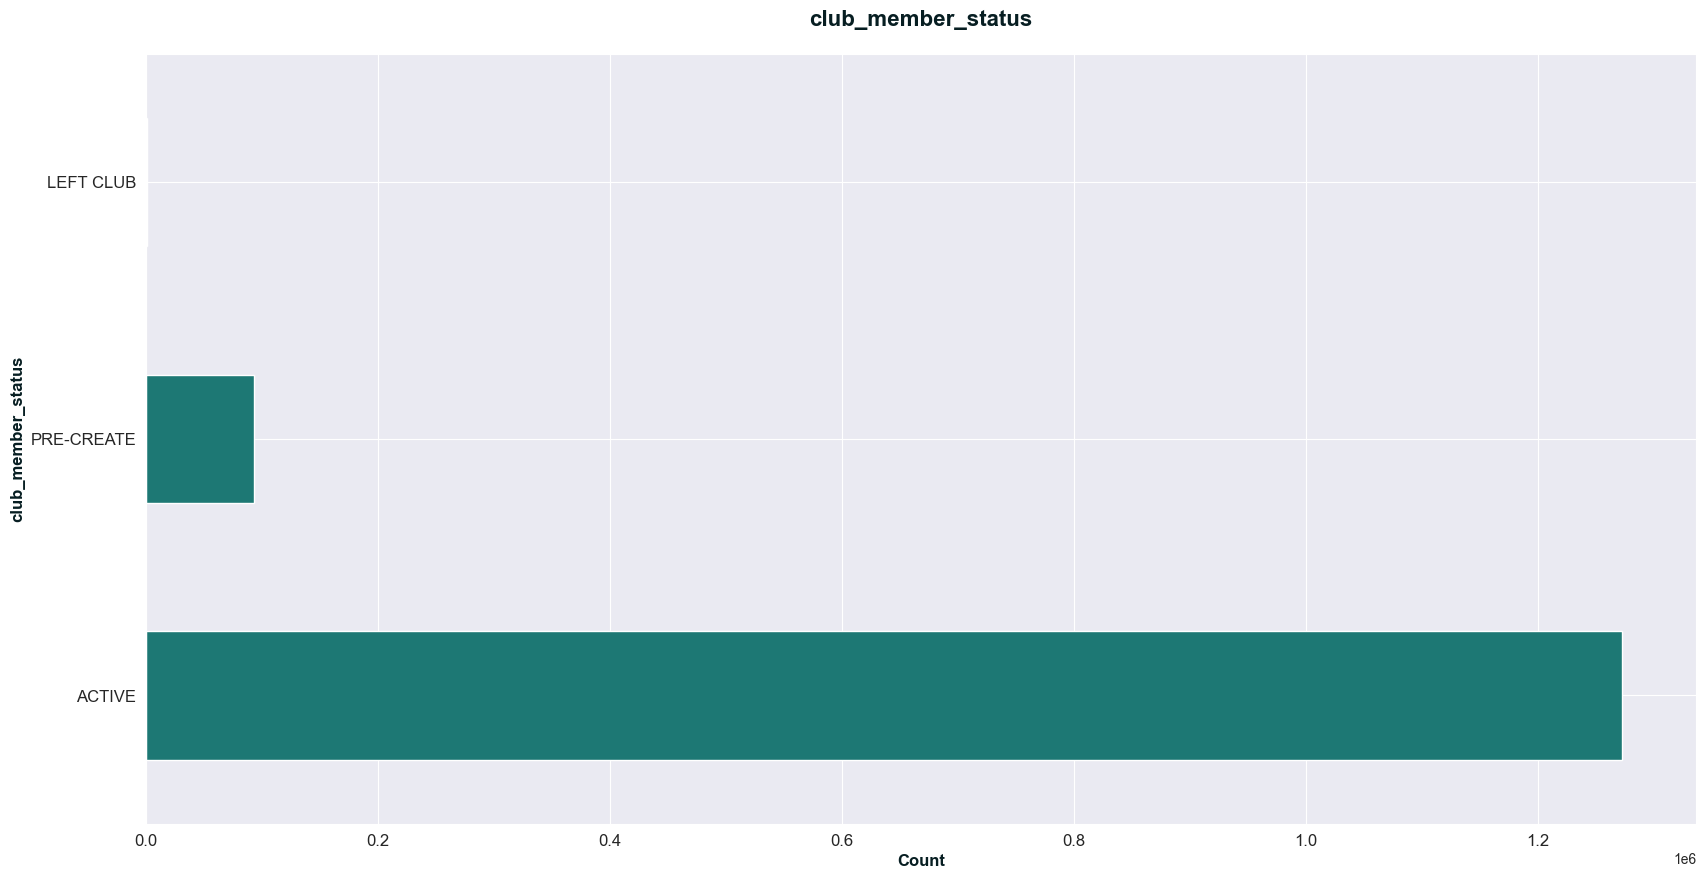

In [78]:
fig = plt.figure(figsize=(20, 10))
customers['club_member_status'].value_counts(ascending=False)[:20].plot(kind='barh', color='#1D7874')
plt.title('club_member_status', fontsize=16, color="#071E22", pad=20, fontweight="bold")
plt.xlabel('Count', fontsize=12, color="#071E22", fontweight="bold")
plt.ylabel('club_member_status', fontsize=12, color="#071E22", fontweight="bold")
plt.tick_params(axis='both', which='major', labelsize=12)
fig.show()

### What is the most common fashion_news_frequency type?

/var/folders/fn/p5d5tjws2g5g48w4774bp3_h0000gn/T/ipykernel_9970/3927000075.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


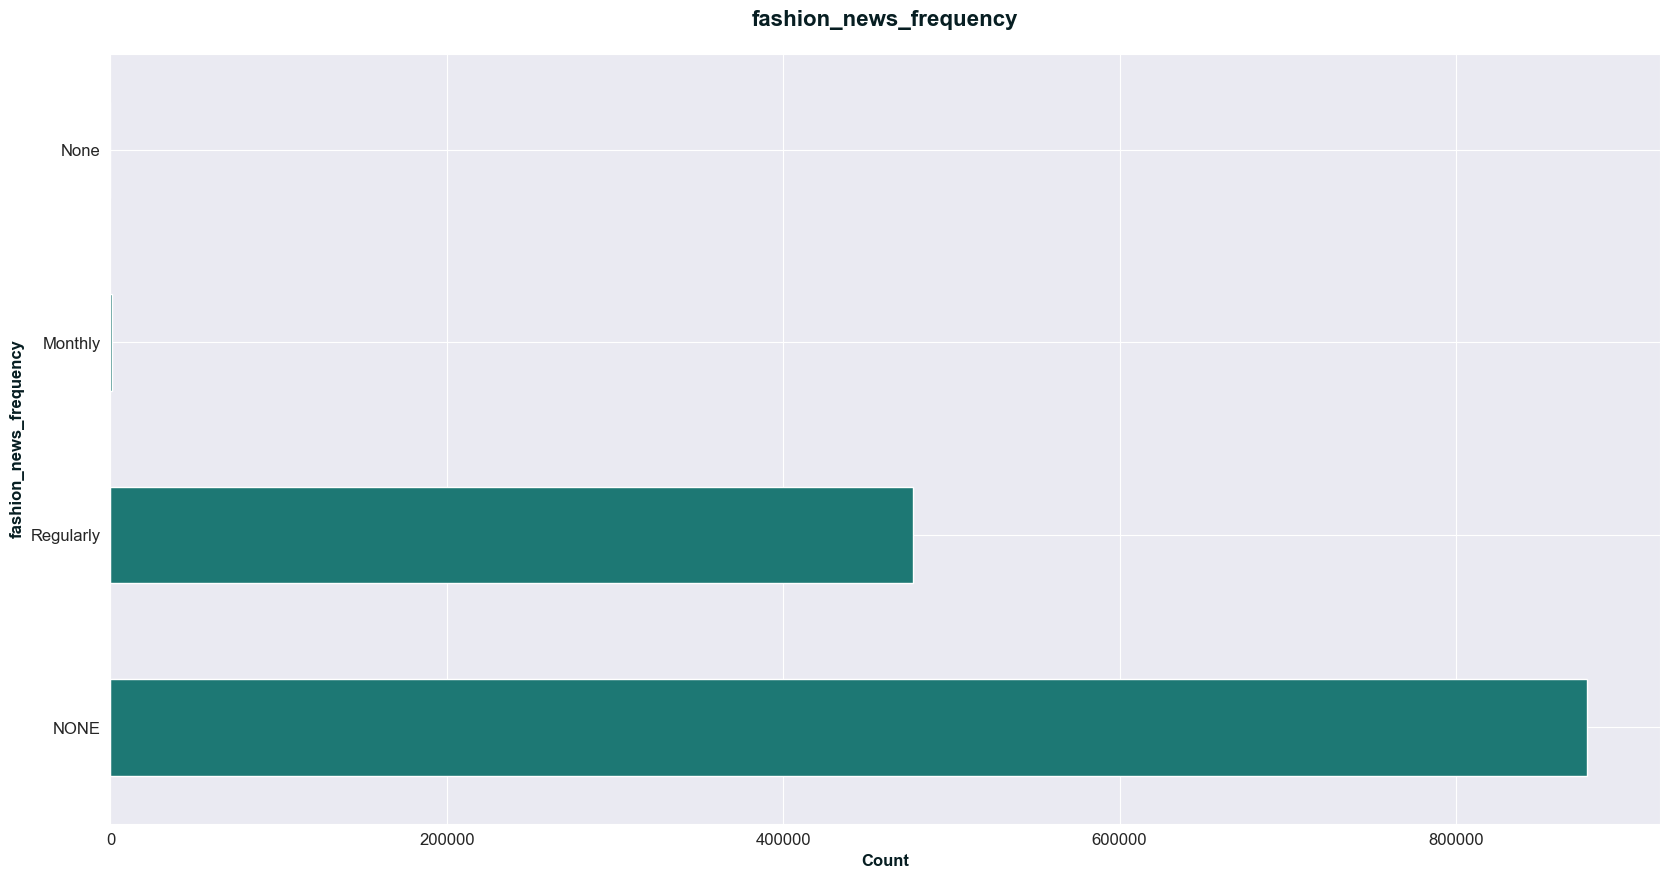

In [79]:
fig = plt.figure(figsize=(20, 10))
customers['fashion_news_frequency'].value_counts(ascending=False)[:20].plot(kind='barh', color='#1D7874')
plt.title('fashion_news_frequency', fontsize=16, color="#071E22", pad=20, fontweight="bold")
plt.xlabel('Count', fontsize=12, color="#071E22", fontweight="bold")
plt.ylabel('fashion_news_frequency', fontsize=12, color="#071E22", fontweight="bold")
plt.tick_params(axis='both', which='major', labelsize=12)
fig.show()

### How does club_member_status compare to fashion_news_frequency?

/var/folders/fn/p5d5tjws2g5g48w4774bp3_h0000gn/T/ipykernel_9970/2152055563.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


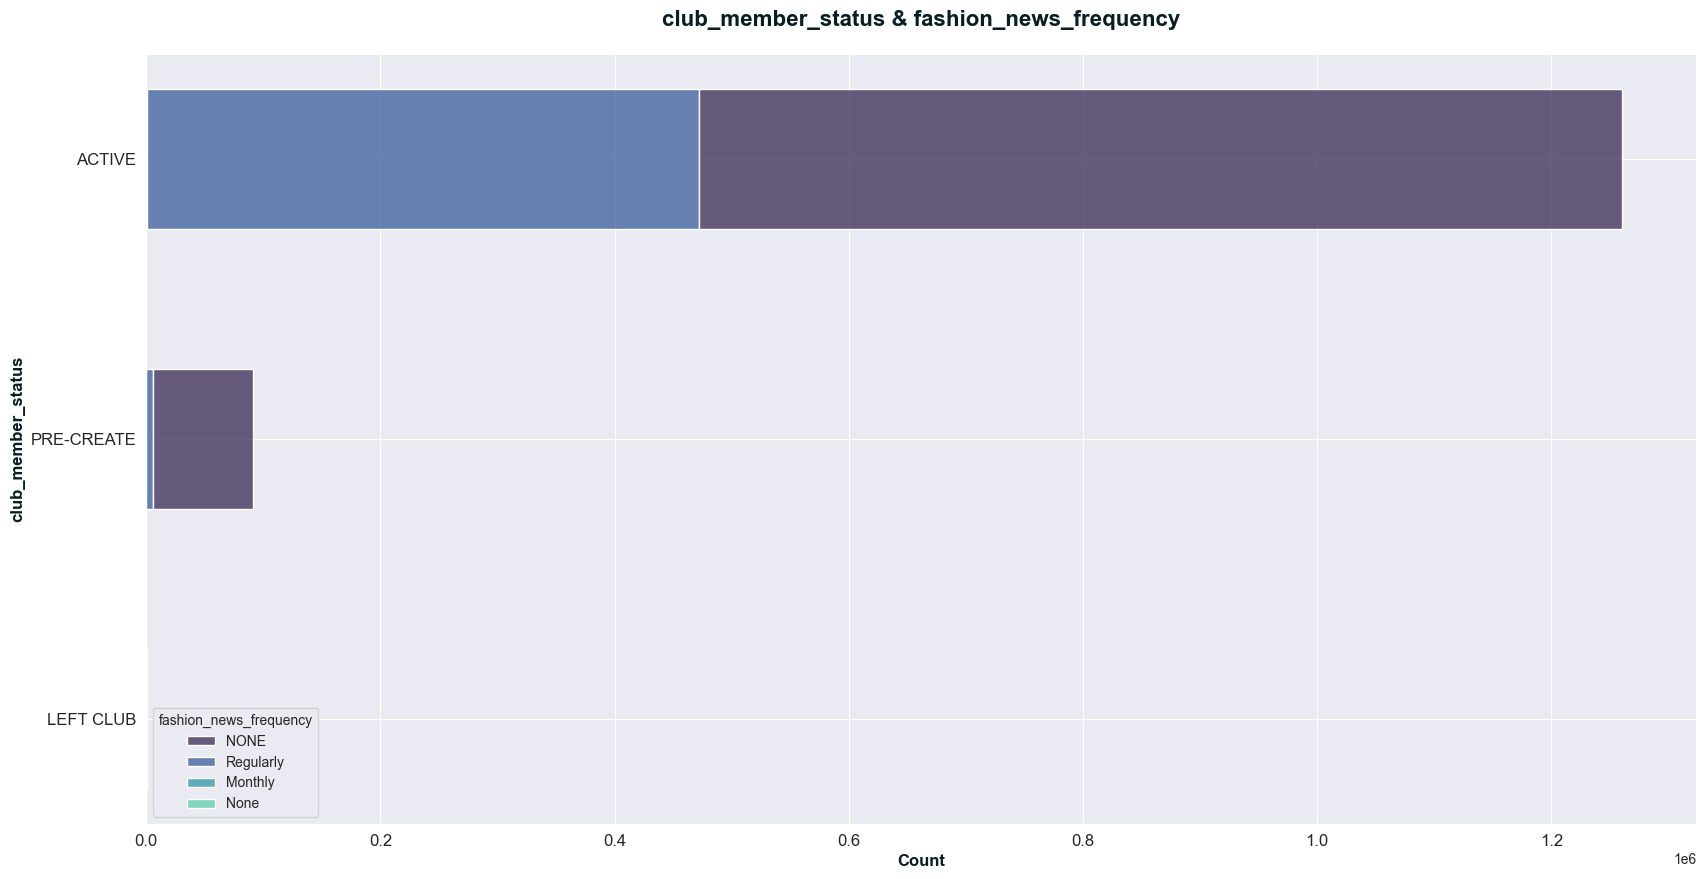

In [80]:
fig = plt.figure(figsize=(20, 10))
sns.histplot(data=customers, y='club_member_status', hue='fashion_news_frequency', multiple='stack', shrink=.5, palette='mako')
plt.title('club_member_status & fashion_news_frequency', fontsize=16, color="#071E22", pad=20, fontweight="bold")
plt.xlabel('Count', fontsize=12, color="#071E22", fontweight="bold")
plt.ylabel('club_member_status', fontsize=12, color="#071E22", fontweight="bold")
plt.tick_params(axis='both', which='major', labelsize=12)
fig.show()